**02.Perform grid search for hyper-parameter tuning**


1. Use the code given in listing 2 to load data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state

# data loading
train_samples = 500
X, y = fetch_openml("mnist_784",version = 1 , return_X_y = True , as_frame = False)
random_state = check_random_state(0)
permutation = random_state.permutation ( X.shape[0])
X = X [permutation]
y = y [permutation]
X = X.reshape ((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size = train_samples, test_size =100)


c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


3. Use lasso logistic regression for image classification as "LogisticRegression(penalty=’l1’, solver=’liblinear’, multi_class=’auto’)". Next, create a pipeline that includes the scaling, the Lasso logistic regression estimator, and a parameter grid for hyperparameter
tuning (C value).

In [4]:
# Create a pipeline with scaling and Lasso logistic regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('lasso', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))
])

# Define a parameter grid for hyperparameter tuning (C value)
param_grid = {
    'lasso__C': np.logspace(-2, 2, 9)
}


4. Use GridSearchCV to perform a grid search over the range (e.g., np.logspace(-2, 2, 9)) of to find optimal value of hyperparameter C.

In [5]:
# Perform GridSearchCV
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best C value
best_C = grid_search.best_params_['lasso__C']
print("Best C value:", best_C)

Best C value: 0.31622776601683794


5. Plot the classification accuracy with respect to hyperparameter C. Comment on your
results.

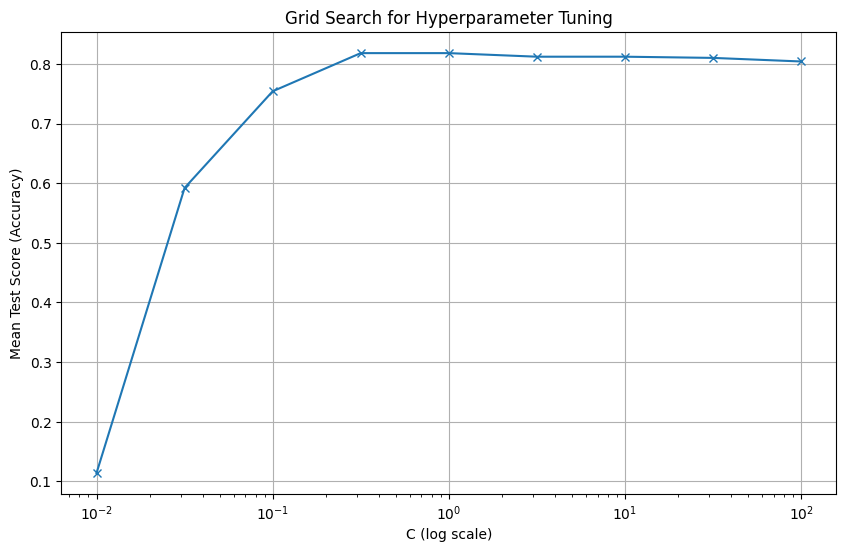

In [6]:
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.semilogx(param_grid['lasso__C'], results['mean_test_score'], marker='x')
plt.xlabel('C (log scale)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search for Hyperparameter Tuning')
plt.grid(True)
plt.show()

6. Calculate confusion matrix, precision, recall and F1-score. Comment on your results.

In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test set using the best C value
y_pred = grid_search.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
[[ 5  0  0  0  0  0  1  0  0  0]
 [ 0  8  1  1  0  0  0  1  0  0]
 [ 0  1  5  0  0  0  2  1  0  0]
 [ 0  1  0  9  0  0  1  0  0  0]
 [ 0  0  0  0 10  0  0  0  1  0]
 [ 0  1  0  0  1  5  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0]
 [ 0  3  0  1  0  0  0  0 11  0]
 [ 0  0  0  1  2  0  0  2  0  6]]
Precision: 0.8164725274725274
Recall: 0.78
F1-score: 0.7779786151898683
